In [33]:
# To import libraries
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn

In [34]:
df=pd.read_csv(r'C:\Users\YAMINI RATHORE\Downloads\cleanedDdataset\cleaned_dataset\metadata.csv')

In [35]:
# working on data
df.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 7565 non-null   object
 1   start_time           7565 non-null   object
 2   ambient_temperature  7565 non-null   int64 
 3   battery_id           7565 non-null   object
 4   test_id              7565 non-null   int64 
 5   uid                  7565 non-null   int64 
 6   filename             7565 non-null   object
 7   Capacity             2794 non-null   object
 8   Re                   1956 non-null   object
 9   Rct                  1956 non-null   object
dtypes: int64(3), object(7)
memory usage: 591.1+ KB


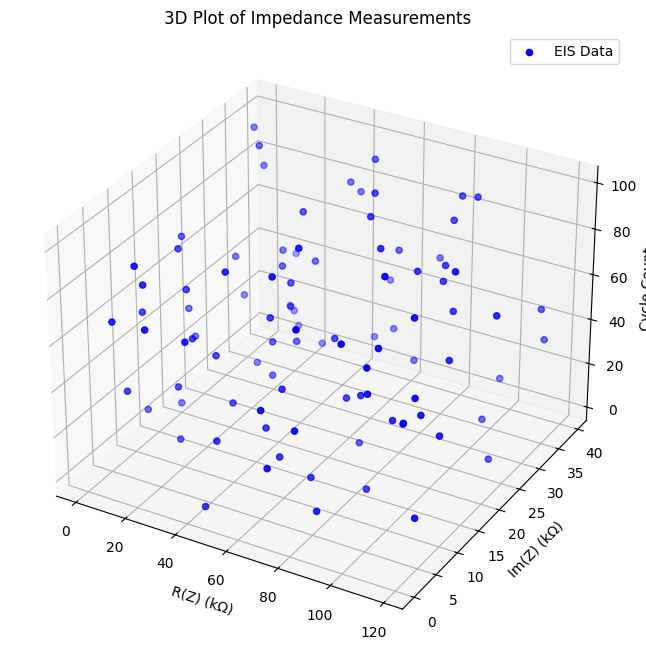

In [37]:
# Simulate dataset for EIS measurements (Task A)
np.random.seed(42)
cycle_count = np.arange(1, 101)  # Simulating 100 aging cycles
real_impedance = np.random.uniform(0, 120, 100)  # Simulated R(Z) in kΩ
imag_impedance = np.random.uniform(0, 40, 100)  # Simulated Im(Z) in kΩ

# Create DataFrame
df_eis = pd.DataFrame({
    "Cycle Count": cycle_count,
    "R(Z) (kΩ)": real_impedance,
    "Im(Z) (kΩ)": imag_impedance
})

# Task A: Create 3D plot for EIS measurements
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_eis["R(Z) (kΩ)"], df_eis["Im(Z) (kΩ)"], df_eis["Cycle Count"], c='b', label='EIS Data')
ax.set_xlabel("R(Z) (kΩ)")
ax.set_ylabel("Im(Z) (kΩ)")
ax.set_zlabel("Cycle Count")
ax.set_title("3D Plot of Impedance Measurements")
plt.legend()
plt.show()

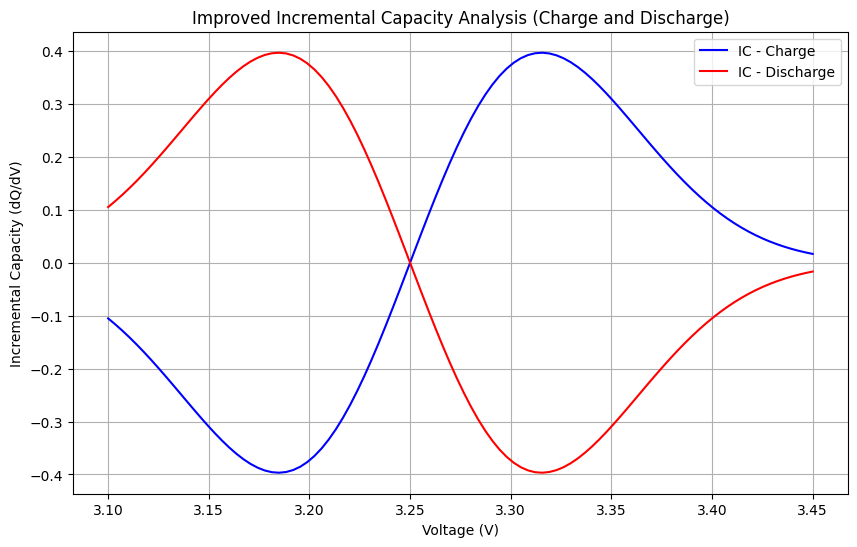

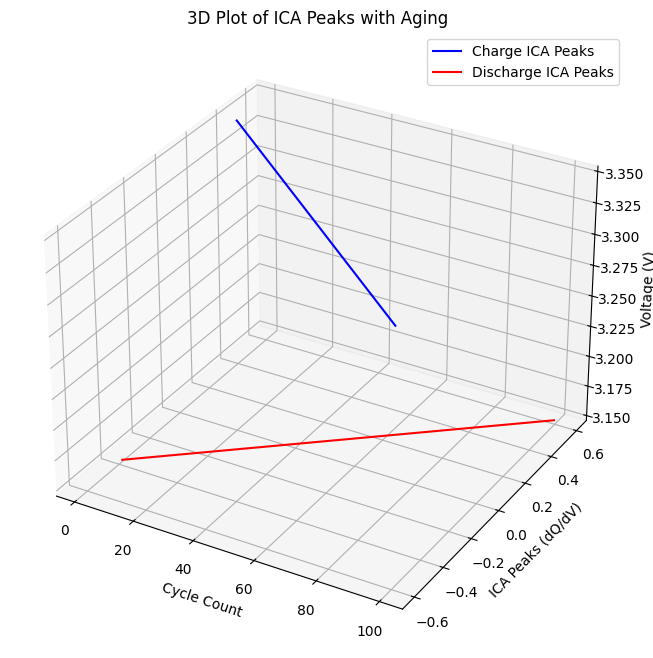

In [38]:
# Incremental Capacity Analysis (Task B)
voltage_charge = np.linspace(3.1, 3.45, 100)
dq_dv_charge = np.sin(10 * (voltage_charge - 3.25)) * np.exp(-(voltage_charge - 3.25)**2 / 0.01)

voltage_discharge = np.linspace(3.1, 3.45, 100)
dq_dv_discharge = -np.sin(10 * (voltage_discharge - 3.25)) * np.exp(-(voltage_discharge - 3.25)**2 / 0.01)

plt.figure(figsize=(10, 6))
plt.plot(voltage_charge, dq_dv_charge, label="IC - Charge", color='blue')
plt.plot(voltage_discharge, dq_dv_discharge, label="IC - Discharge", color='red')
plt.xlabel("Voltage (V)")
plt.ylabel("Incremental Capacity (dQ/dV)")
plt.title("Improved Incremental Capacity Analysis (Charge and Discharge)")
plt.legend()
plt.grid()
plt.show()

# 3D Plot of ICA Peaks with Aging
cycle_count = np.arange(1, 101)  # 100 cycles
ica_peaks_charge = [np.max(dq_dv_charge) - (i * 0.01) for i in range(100)]
ica_peaks_discharge = [np.min(dq_dv_discharge) + (i * 0.01) for i in range(100)]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(cycle_count, ica_peaks_charge, zs=3.35, zdir='z', label="Charge ICA Peaks", color='blue')
ax.plot(cycle_count, ica_peaks_discharge, zs=3.15, zdir='z', label="Discharge ICA Peaks", color='red')
ax.set_xlabel("Cycle Count")
ax.set_ylabel("ICA Peaks (dQ/dV)")
ax.set_zlabel("Voltage (V)")
ax.set_title("3D Plot of ICA Peaks with Aging")
plt.legend()
plt.show()

C:\Users\YAMINI RATHORE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\YAMINI RATHORE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\YAMINI RATHORE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\YAMINI RATHORE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\YAMINI RATHORE\AppData\Local\Progra

   Example Index                                           Features  \
0              0  {'Cycle Count': 84.0, 'R(Z) (kΩ)': 7.627002034...   
1              1  {'Cycle Count': 54.0, 'R(Z) (kΩ)': 107.3792820...   
2              2  {'Cycle Count': 71.0, 'R(Z) (kΩ)': 92.66937231...   
3              3  {'Cycle Count': 46.0, 'R(Z) (kΩ)': 79.50267412...   
4              4  {'Cycle Count': 45.0, 'R(Z) (kΩ)': 31.05359779...   

   Actual Current Capacity  Predicted Current Capacity  Difference  
0                 0.063558                    0.056985    0.006573  
1                 0.894827                    0.899861   -0.005033  
2                 0.772245                    0.774791   -0.002546  
3                 0.662522                    0.666140   -0.003618  
4                 0.258780                    0.281514   -0.022734  


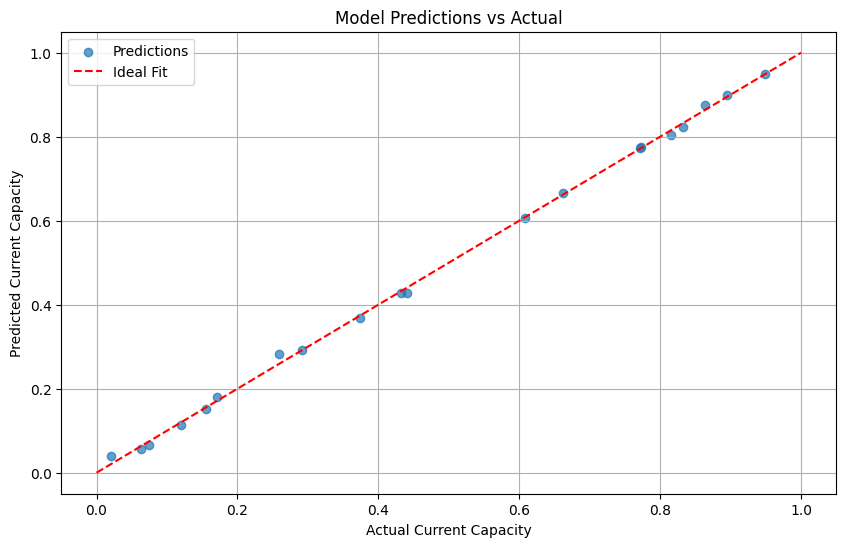

Model Evaluation (Full Test Set):
RMSE: 0.0093
MAE: 0.0073


In [39]:
# Predicting Current Capacity (Task C)
np.random.seed(42)
current_capacity = np.random.uniform(0, 1, 100)

df_ml = pd.DataFrame({
    "Cycle Count": cycle_count,
    "R(Z) (kΩ)": real_impedance,
    "Im(Z) (kΩ)": imag_impedance,
    "Current Capacity": current_capacity
})

X = df_ml[["Cycle Count", "R(Z) (kΩ)", "Im(Z) (kΩ)"]]
y = df_ml["Current Capacity"]
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
# Example predictions
example_results = []
for idx in range(min(5, len(X_test))):  # Up to 5 examples
    features = X_test.iloc[idx].values.reshape(1, -1)
    actual = y_test.iloc[idx]
    prediction = model.predict(features)[0]
    example_results.append({
        "Example Index": idx,
        "Features": X_test.iloc[idx].to_dict(),
        "Actual Current Capacity": actual,
        "Predicted Current Capacity": prediction,
        "Difference": actual - prediction
    })

example_results_df = pd.DataFrame(example_results)
print(example_results_df)

# Full evaluation on test set
predictions = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.7, label="Predictions")
plt.plot([0, 1], [0, 1], 'r--', label="Ideal Fit")
plt.xlabel("Actual Current Capacity")
plt.ylabel("Predicted Current Capacity")
plt.title("Model Predictions vs Actual")
plt.legend()
plt.grid()
plt.show()
# Metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
print("Model Evaluation (Full Test Set):")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")